In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("sample_marketing_dataset.csv")

print("----- Head of Dataset -----")
print(df.head())

print("\n----- Columns -----")
print(df.columns)

print("\n----- Shape -----")
print(df.shape)

----- Head of Dataset -----
   Age  Income  Previous_Response Channel  Response
0   25   45000                  1   Email         1
1   34   60000                  0     SMS         0
2   45   80000                  1   Email         1
3   23   32000                  0   Phone         0
4   36   55000                  1   Email         1

----- Columns -----
Index(['Age', 'Income', 'Previous_Response', 'Channel', 'Response'], dtype='object')

----- Shape -----
(10, 5)


In [2]:
print("\n----- Missing Values -----")
print(df.isnull().sum())

print("\n----- Data Types -----")
print(df.dtypes)

print("\n----- Statistical Summary -----")
print(df.describe())


----- Missing Values -----
Age                  0
Income               0
Previous_Response    0
Channel              0
Response             0
dtype: int64

----- Data Types -----
Age                   int64
Income                int64
Previous_Response     int64
Channel              object
Response              int64
dtype: object

----- Statistical Summary -----
             Age        Income  Previous_Response   Response
count  10.000000      10.00000          10.000000  10.000000
mean   35.500000   61500.00000           0.600000   0.600000
std     8.984555   24676.79972           0.516398   0.516398
min    23.000000   32000.00000           0.000000   0.000000
25%    28.250000   45750.00000           0.000000   0.000000
50%    35.000000   57500.00000           1.000000   1.000000
75%    41.750000   67500.00000           1.000000   1.000000
max    50.000000  120000.00000           1.000000   1.000000


In [3]:
df["Income_per_Age"] = df["Income"] / df["Age"]
df["High_Income"] = (df["Income"] > 60000).astype(int)
df["Previous_and_Response"] = df["Previous_Response"] * df["Response"]

print("\n----- New Engineered Columns Added -----")
print(df.head())


----- New Engineered Columns Added -----
   Age  Income  Previous_Response Channel  Response  Income_per_Age  \
0   25   45000                  1   Email         1     1800.000000   
1   34   60000                  0     SMS         0     1764.705882   
2   45   80000                  1   Email         1     1777.777778   
3   23   32000                  0   Phone         0     1391.304348   
4   36   55000                  1   Email         1     1527.777778   

   High_Income  Previous_and_Response  
0            0                      1  
1            0                      0  
2            1                      1  
3            0                      0  
4            0                      1  


In [4]:
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

print("\n----- Correlation Matrix -----")
print(correlation_matrix)


----- Correlation Matrix -----
                            Age    Income  Previous_Response  Response  \
Age                    1.000000  0.847704           0.287381  0.287381   
Income                 0.847704  1.000000           0.401090  0.401090   
Previous_Response      0.287381  0.401090           1.000000  1.000000   
Response               0.287381  0.401090           1.000000  1.000000   
Income_per_Age         0.383242  0.804901           0.407399  0.407399   
High_Income            0.780859  0.796978           0.534522  0.534522   
Previous_and_Response  0.287381  0.401090           1.000000  1.000000   

                       Income_per_Age  High_Income  Previous_and_Response  
Age                          0.383242     0.780859               0.287381  
Income                       0.804901     0.796978               0.401090  
Previous_Response            0.407399     0.534522               1.000000  
Response                     0.407399     0.534522               1.0000

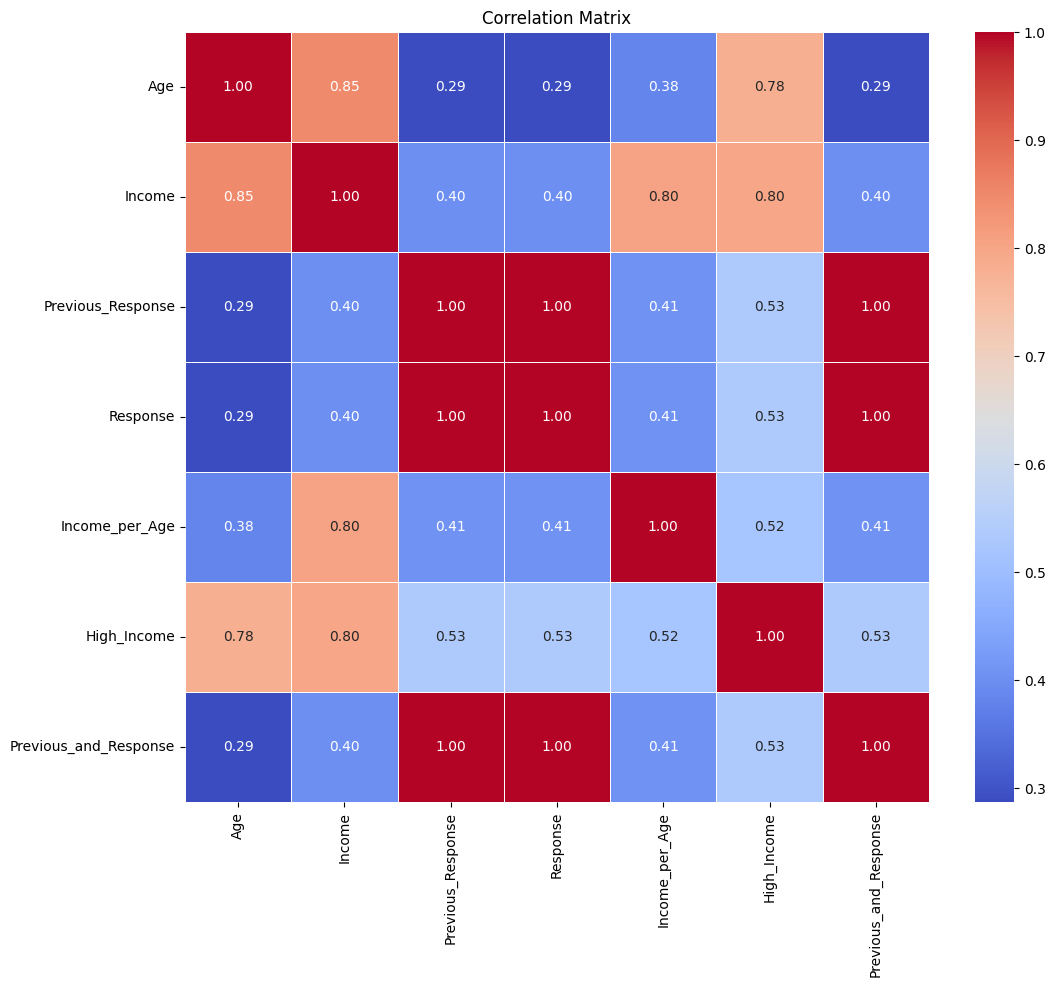

In [5]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
            fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

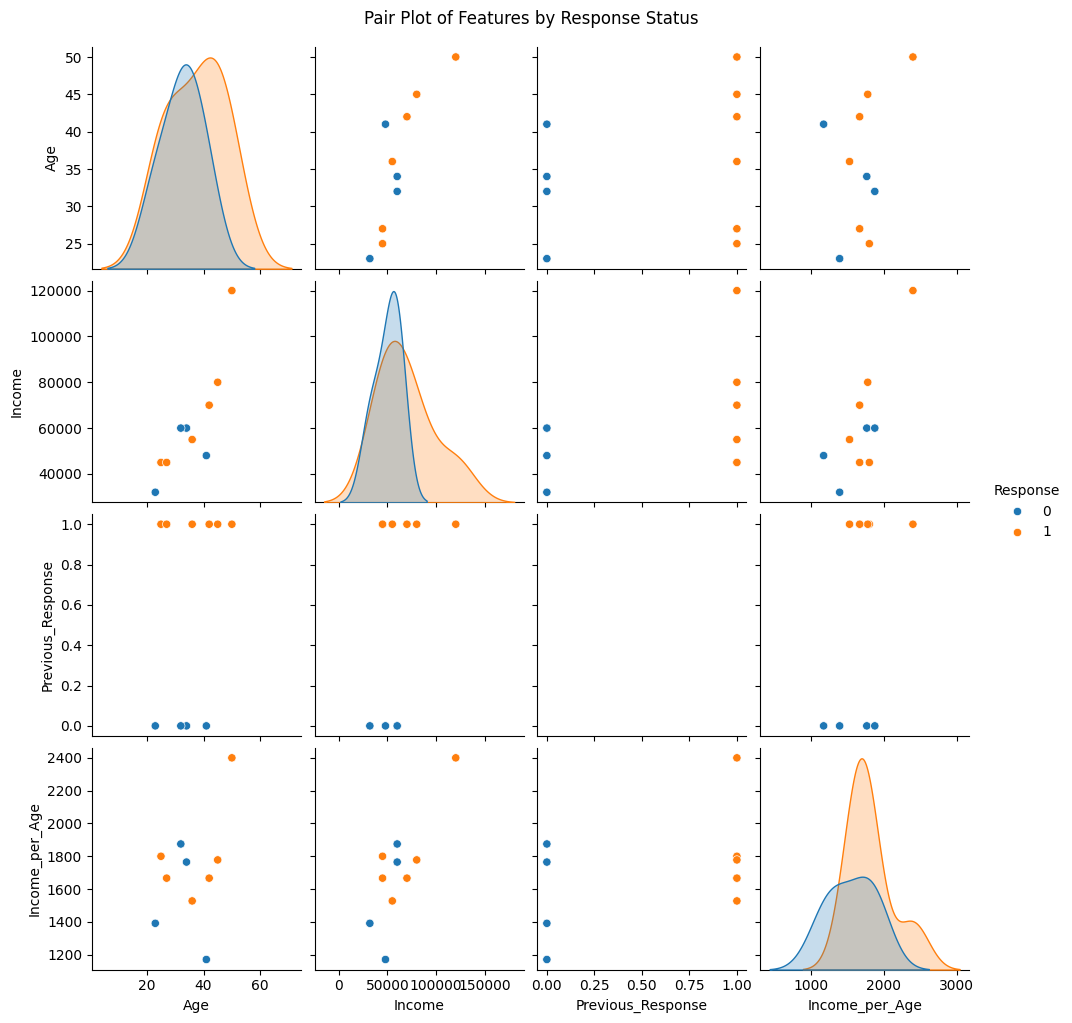

In [6]:
sns.pairplot(df,
             hue='Response',
             vars=['Age', 'Income', 'Previous_Response', 'Income_per_Age'])
plt.suptitle("Pair Plot of Features by Response Status", y=1.02)
plt.show()